In [1]:
import os
import json
import requests

from azureml.core import Workspace
from azureml.core.model import Model
from azureml.core.environment import Environment
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.model import InferenceConfig
from azureml.core.webservice import AciWebservice, Webservice

### Creating Azure ML Workspace

In [2]:
subscription_id = '<SUBSCRIPTION-ID>'
resource_group = 'rg-dps-ai'  
workspace_name = 'aml4_ws_ml_forecasting'
region = 'northeurope'

In [3]:
ws = Workspace.create(name=workspace_name,
                      subscription_id=subscription_id,
                      resource_group=resource_group,
                      location=region)

print(f'Workspace {workspace_name} created')

Deploying StorageAccount with name aml4wsmlstorage7ac71dc6e.
Deploying KeyVault with name aml4wsmlkeyvault27da1190.
Deploying AppInsights with name aml4wsmlinsightscdfbd3da.
Deployed AppInsights with name aml4wsmlinsightscdfbd3da. Took 2.9 seconds.
Deployed KeyVault with name aml4wsmlkeyvault27da1190. Took 18.33 seconds.
Deploying Workspace with name aml4_ws_ml_forecasting.
Deployed StorageAccount with name aml4wsmlstorage7ac71dc6e. Took 23.29 seconds.
Deployed Workspace with name aml4_ws_ml_forecasting. Took 20.87 seconds.
Workspace aml4_ws_ml_forecasting created


In [6]:
# workspace_name = 'aml4_ws_ml_forecasting'
# ws = Workspace(subscription_id,
#                resource_group,
#                workspace_name
#               )

### Registering model in workspace

In [4]:
model_file = 'forecast.pkl'
model_name = 'accident_forecasting_model'

In [5]:
registered_model = Model.register(model_path=model_file, model_name=model_name, workspace=ws, model_framework='statsmodels', 
                                  model_framework_version='0.14.2')

Registering model accident_forecasting_model


### Deploying model with Azure ML Studio

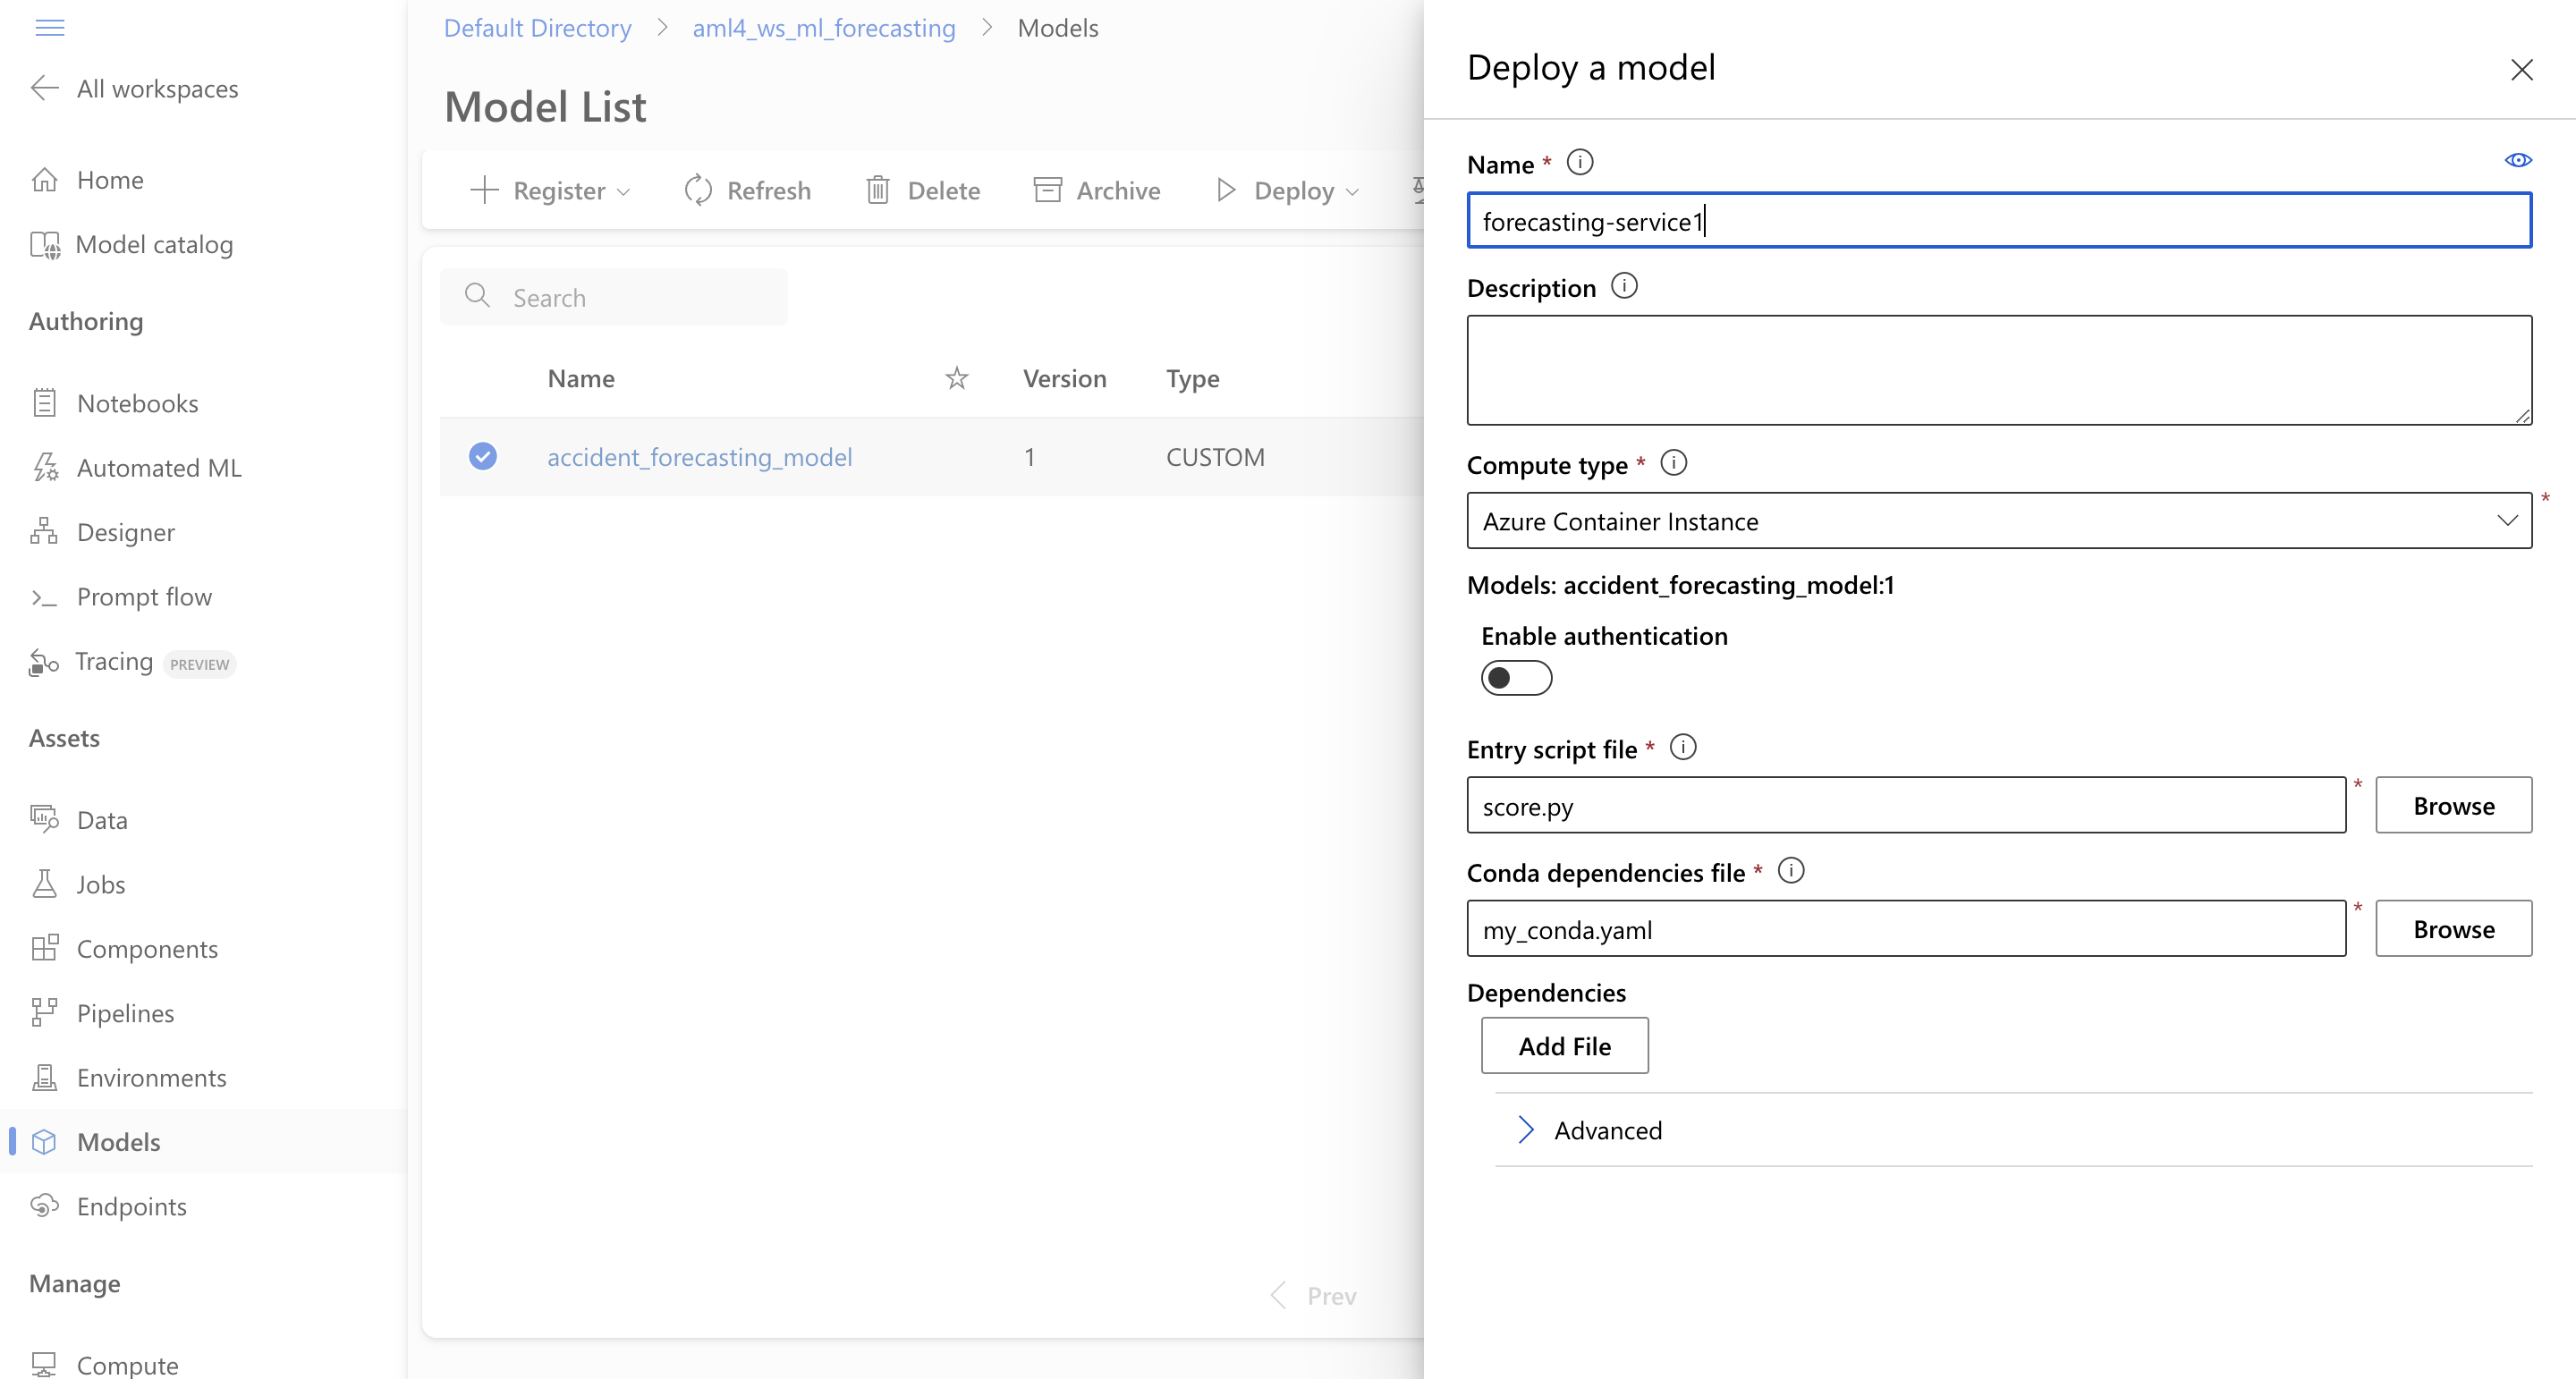

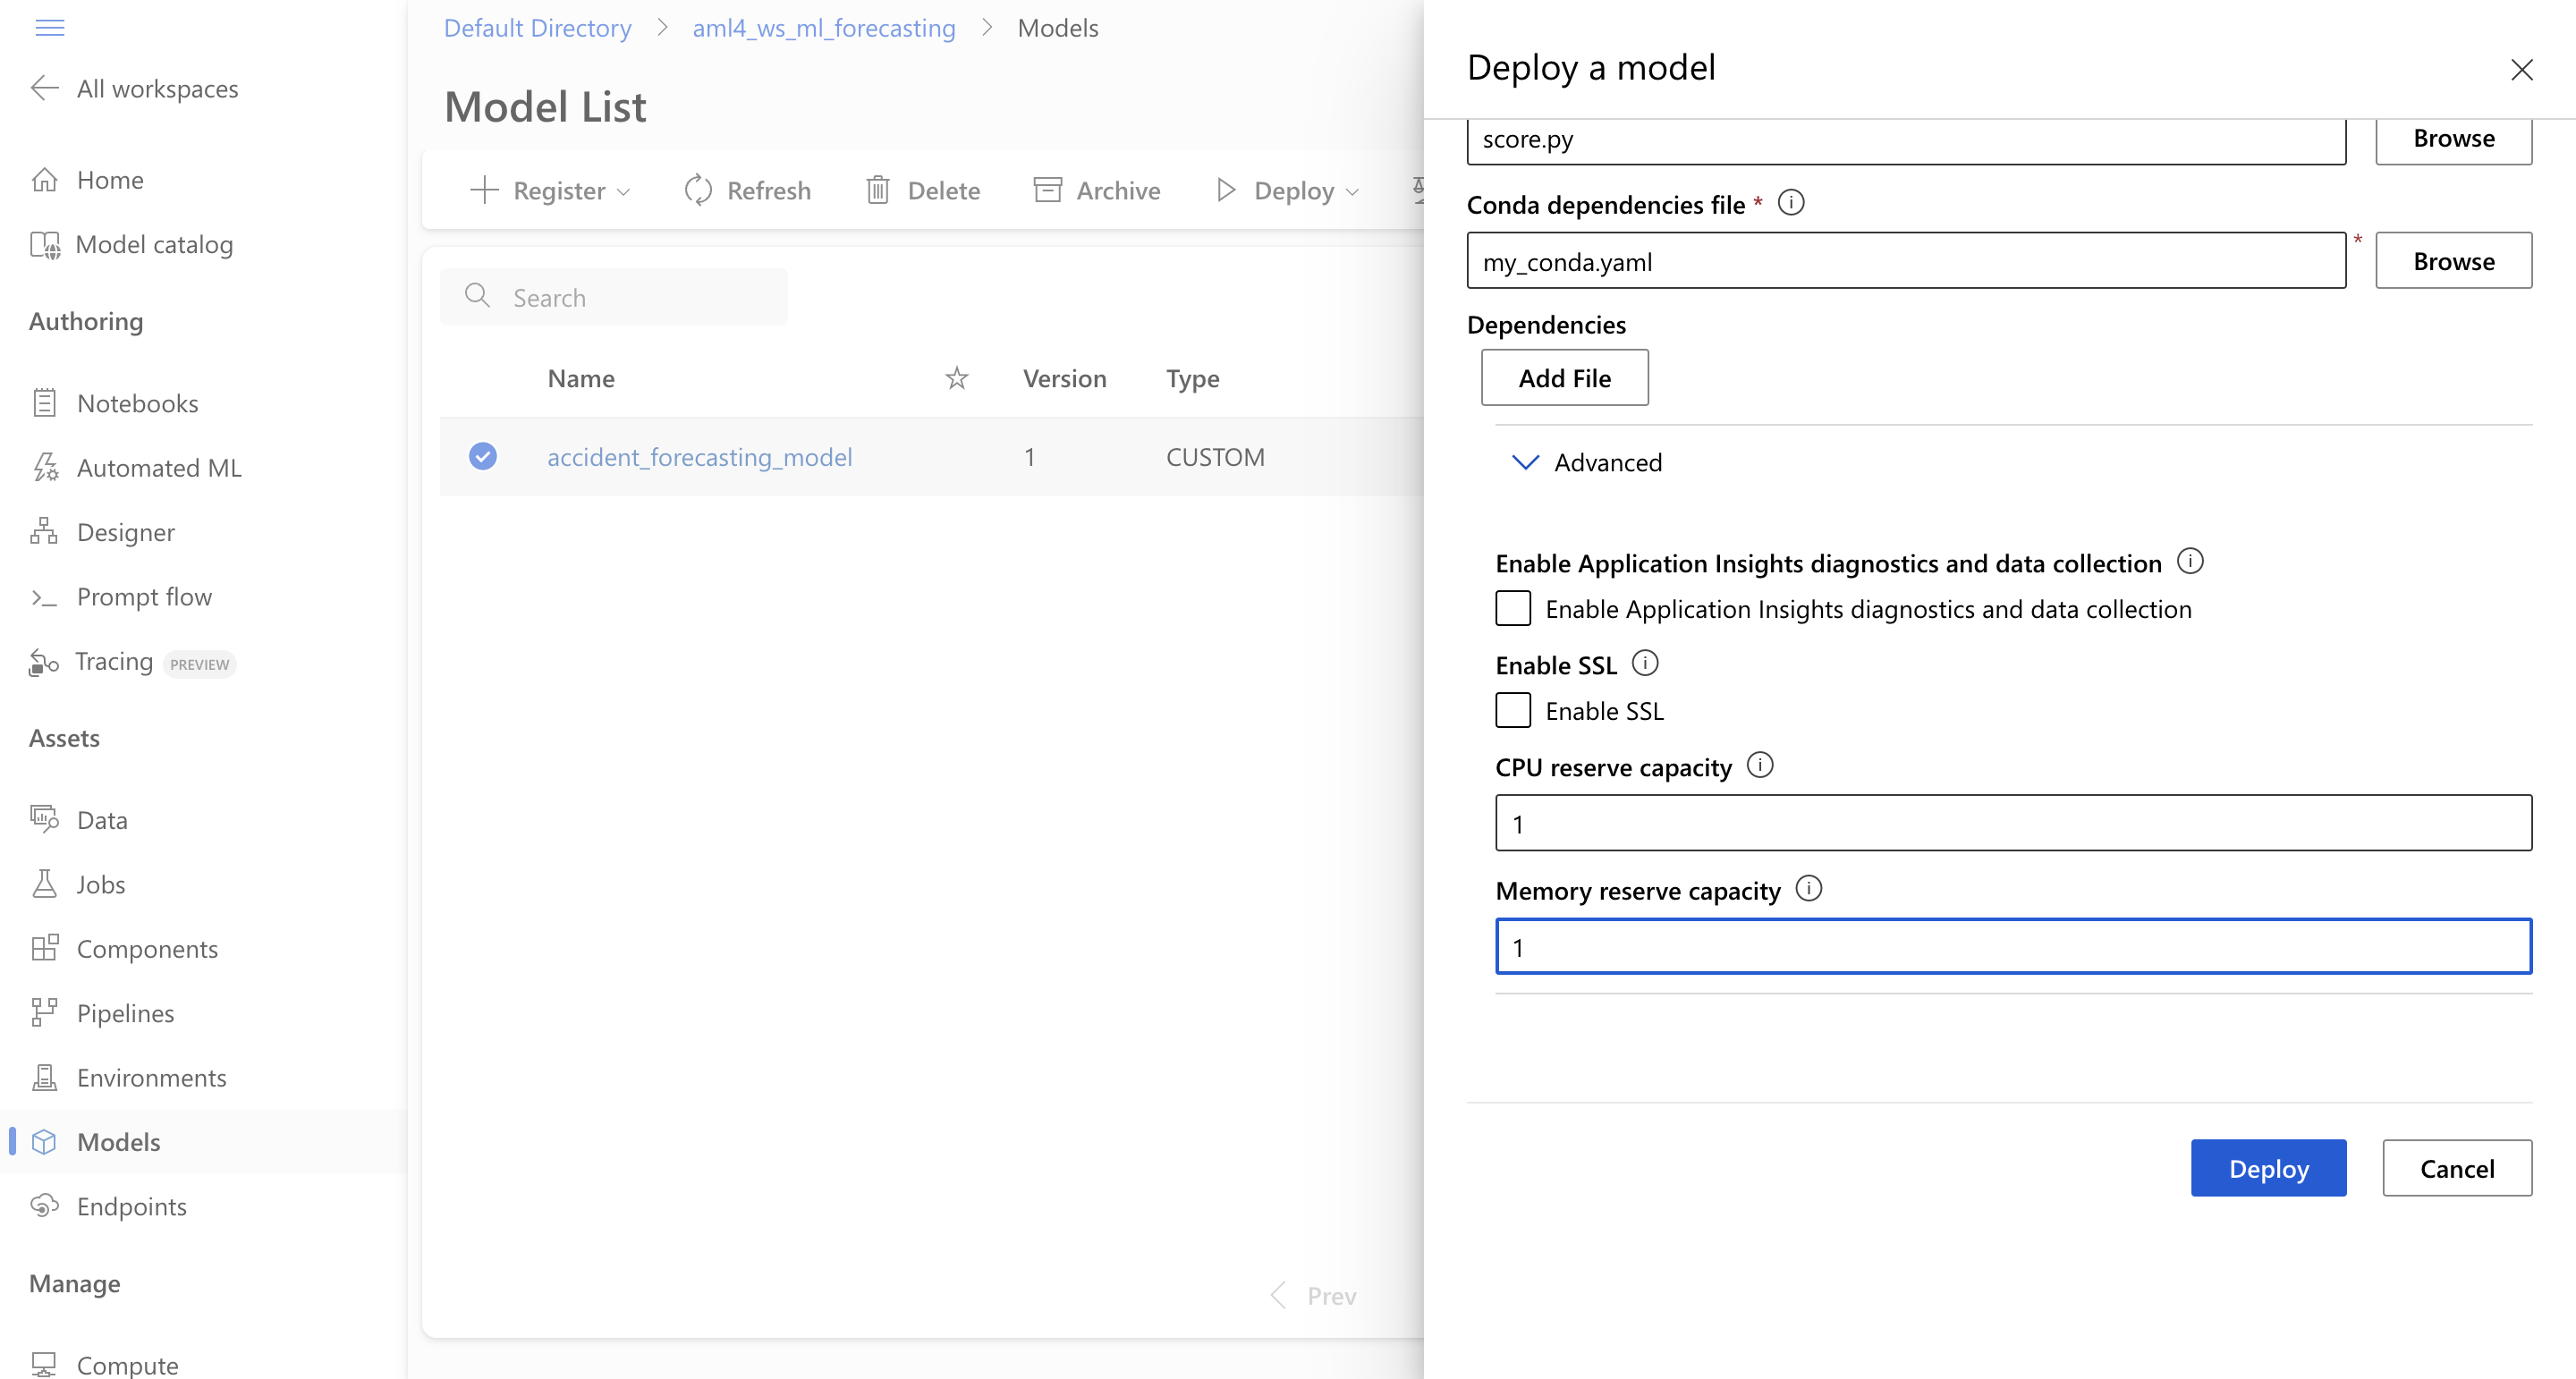

### Deployment status

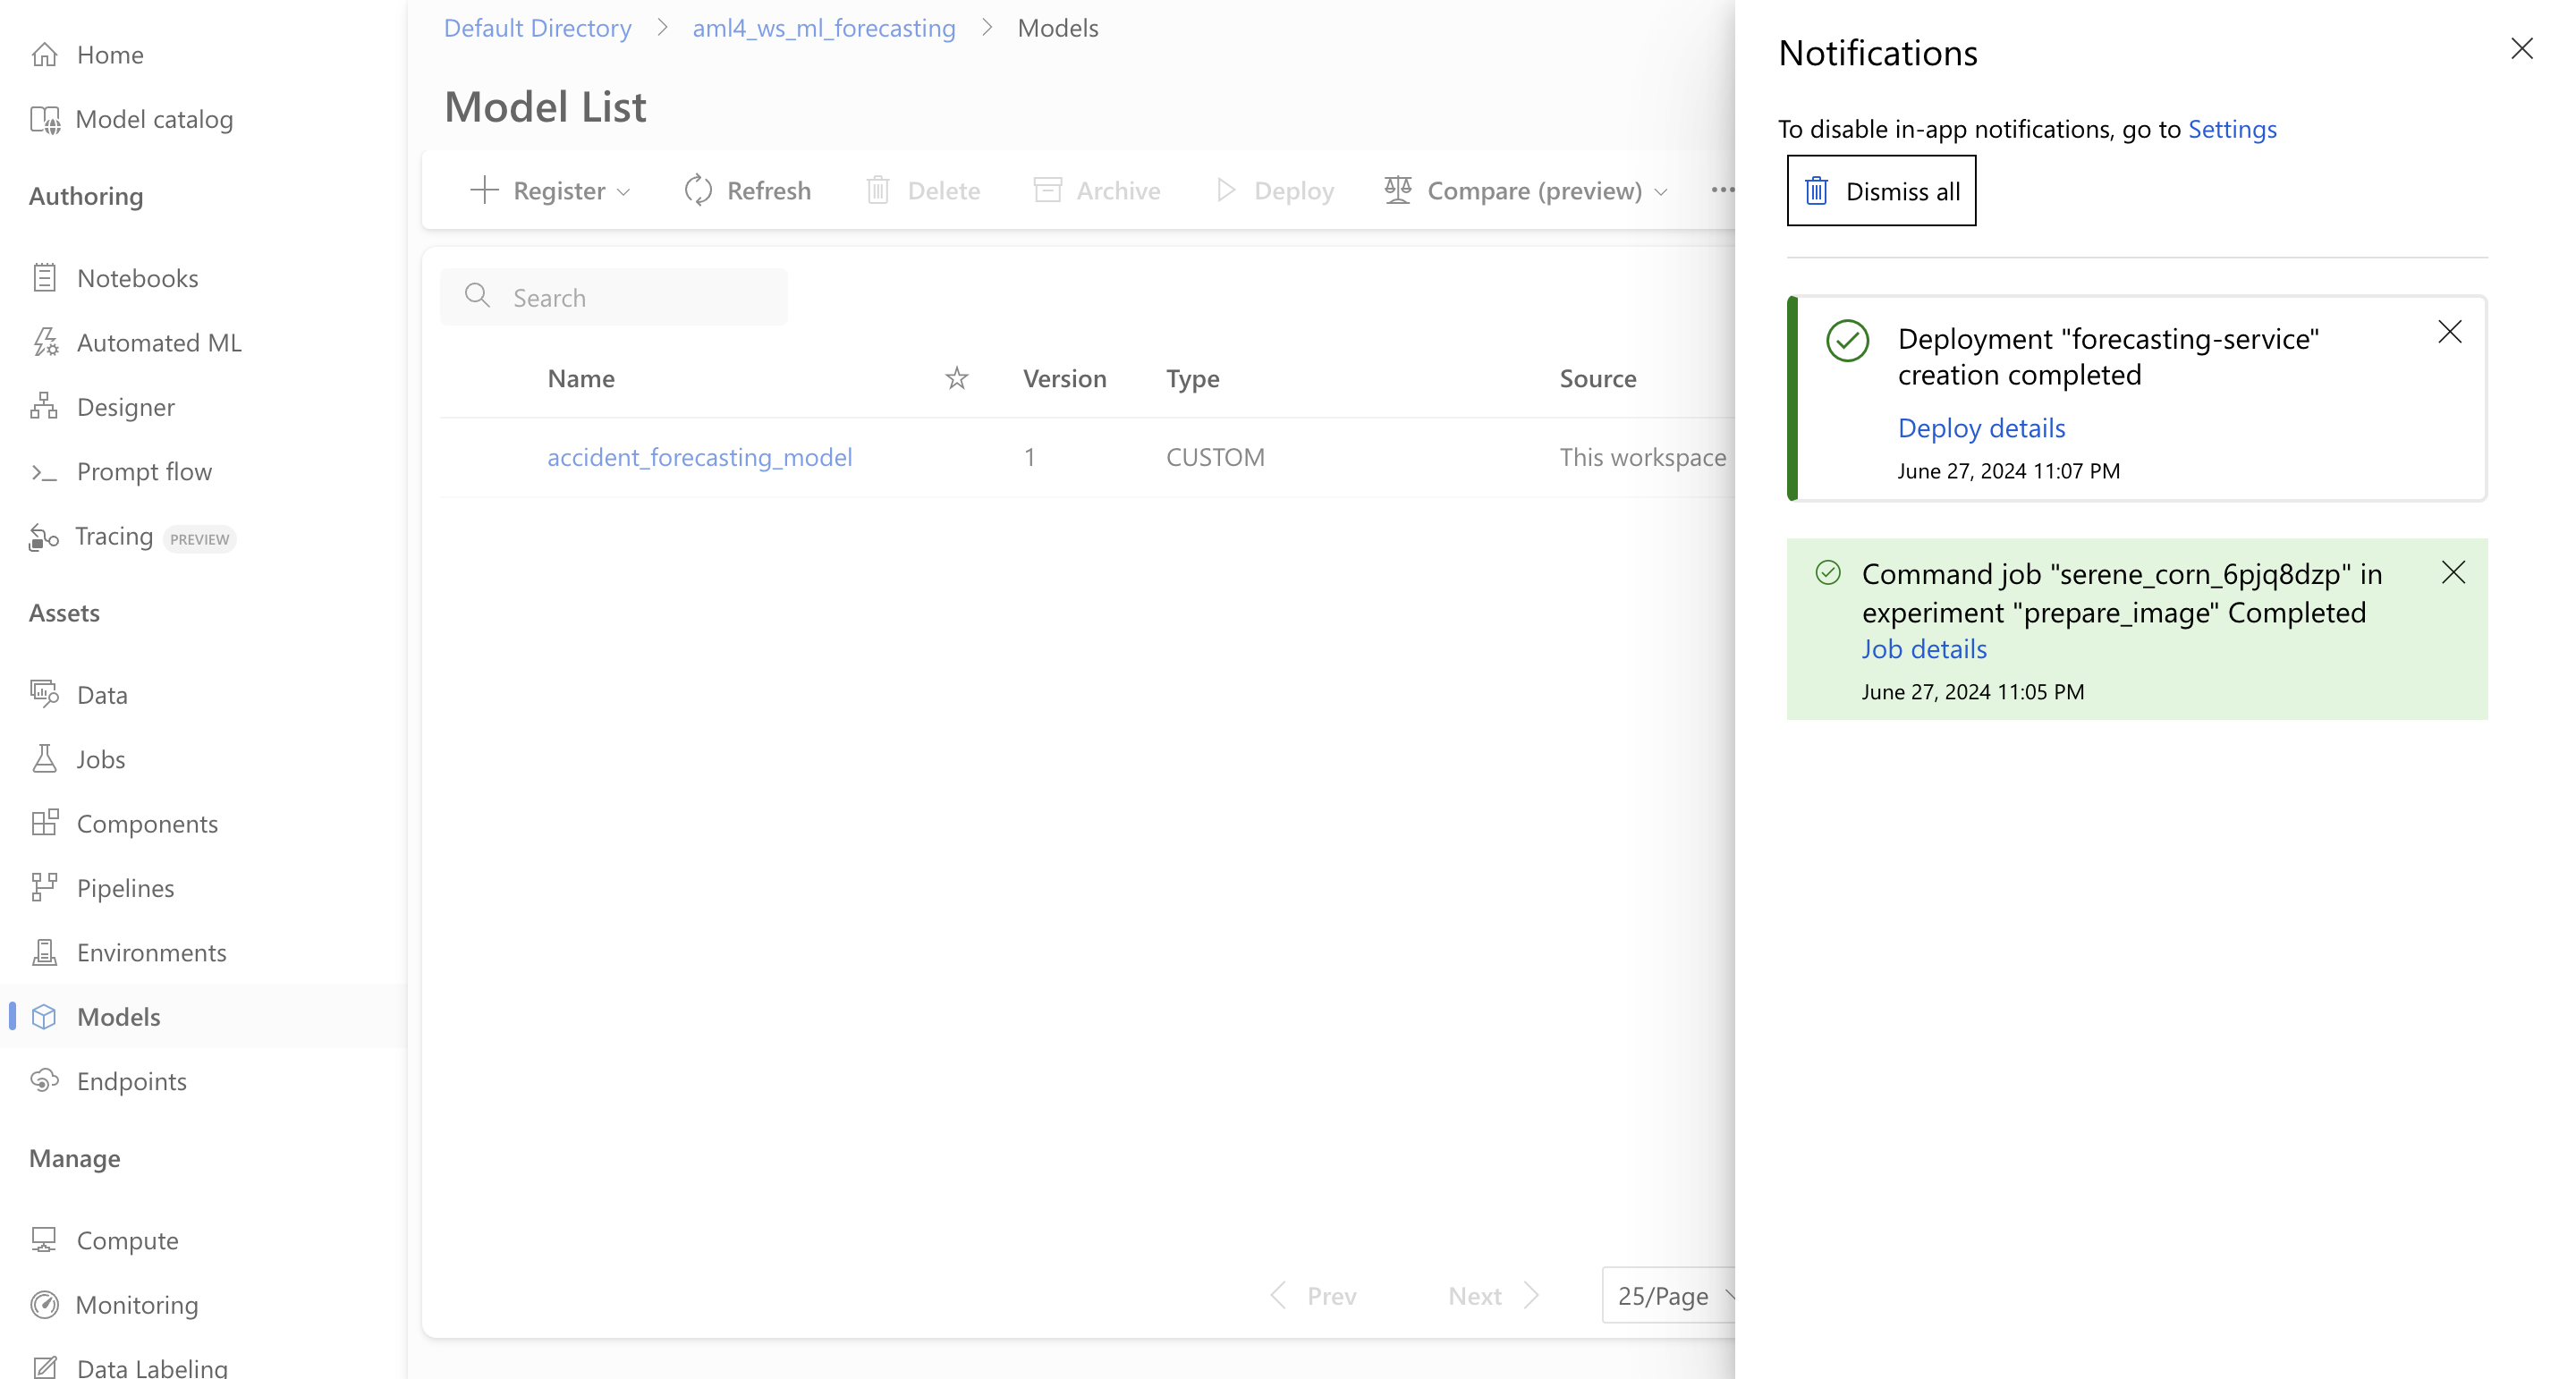

In [8]:
# env = Environment.from_existing_conda_environment('test', 'dps_env')

Exporting conda specifications for existing conda environment: dps_env


In [6]:
# Create a Conda environment for your scikit-learn model
# conda_env = Environment('my-conda-env')
# conda_env.python.conda_dependencies = CondaDependencies.create(conda_packages=['scikit-learn'], pip_packages=['statsmodels', 'azureml-defaults', 'numpy', 'pickle'])

In [6]:
# inference_config = InferenceConfig(entry_script='score.py', environment=conda_env)

In [7]:
# aci_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)

In [12]:
# service = Model.deploy(workspace=ws,
#                        name='forecasting-service',
#                        models=[registered_model],
#                        inference_config=inference_config,
#                        deployment_config=aci_config)
# service.wait_for_deployment(show_output=True)

### Testing deployment

In [11]:
import requests
import json

# Input data
input_data_json = json.dumps({"year": "2021", "month": "10"})

# endpoint
scoring_uri = 'http://4ac29a78-1148-4042-a9dd-0f66273e04c2.northeurope.azurecontainer.io/score' 

# Define the content type
headers = {"Content-Type": "application/json"}

# Send an HTTP POST request to the endpoint
response = requests.post(scoring_uri, data=input_data_json, headers=headers)

# Check the response status code
if response.status_code == 200:
    # Parse the JSON response
    result = json.loads(response.json())
    
    # Extract the prediction (result) from the response
    prediction = result["Prediction"]
    print(f"Prediction: {prediction}")
else:
    print(f"Error: {response.text}")

Prediction: 38.71309793849907


## Deleting (utility)

In [7]:
# Delete the service

# service_name = "forecasting-service"

# service = ws.webservices[service_name]
# service.delete()

Running
2024-06-27 22:33:43+02:00 Check and wait for operation (bd8aa686-acfb-478c-bdfe-9f2944bd34c6) to finish.
2024-06-27 22:33:43+02:00 Deleting service entity.
Succeeded


In [8]:
# Specify the name of the registered model to delete
# model_name = 'accident_forecasting_model'

# # Delete the model
# registered_model = ws.models[model_name]
# registered_model.delete()

In [9]:
# Delete the workspace
# ws.delete(delete_dependent_resources=True)